In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [164]:
df = pd.read_csv('air_data.csv')
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,2011/5/20,2013/6/5,女,4,广州,广东,CN,25.0,2014/3/31,...,12318,12318,12123,12318,12123,1.000000,0.000000,0.000000,0.000000,22
62984,36041,2010/3/8,2013/9/14,男,4,佛山,广东,CN,38.0,2014/3/31,...,106972,106972,56506,106972,56506,1.000000,0.000000,0.000000,0.000000,43
62985,45690,2006/3/30,2006/12/2,女,4,广州,广东,CN,43.0,2014/3/31,...,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0
62986,61027,2013/2/6,2013/2/14,女,4,广州,广东,CN,36.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

In [166]:
feat_num = [ i for i in df.columns if df[i].dtype != 'object' ]
len(feat_num)
# df['Ration_P1Y_BPS'].dtype

36

In [167]:
for i in feat_num:
    print('%s 列空值个数：%s，最大值：%s ， 最小值：%s' % (
        i, df[i].isnull().sum(),df[i].max(),df[i].min()
            )
         )

MEMBER_NO 列空值个数：0，最大值：62988 ， 最小值：1
FFP_TIER 列空值个数：0，最大值：6 ， 最小值：4
AGE 列空值个数：420，最大值：110.0 ， 最小值：6.0
FLIGHT_COUNT 列空值个数：0，最大值：213 ， 最小值：2
BP_SUM 列空值个数：0，最大值：505308 ， 最小值：0
EP_SUM_YR_1 列空值个数：0，最大值：0 ， 最小值：0
EP_SUM_YR_2 列空值个数：0，最大值：74460 ， 最小值：0
SUM_YR_1 列空值个数：551，最大值：239560.0 ， 最小值：0.0
SUM_YR_2 列空值个数：138，最大值：234188.0 ， 最小值：0.0
SEG_KM_SUM 列空值个数：0，最大值：580717 ， 最小值：368
WEIGHTED_SEG_KM 列空值个数：0，最大值：558440.14 ， 最小值：0.0
AVG_FLIGHT_COUNT 列空值个数：0，最大值：26.625 ， 最小值：0.25
AVG_BP_SUM 列空值个数：0，最大值：63163.5 ， 最小值：0.0
BEGIN_TO_FIRST 列空值个数：0，最大值：729 ， 最小值：0
LAST_TO_END 列空值个数：0，最大值：731 ， 最小值：1
AVG_INTERVAL 列空值个数：0，最大值：728.0 ， 最小值：0.0
MAX_INTERVAL 列空值个数：0，最大值：728 ， 最小值：0
ADD_POINTS_SUM_YR_1 列空值个数：0，最大值：600000 ， 最小值：0
ADD_POINTS_SUM_YR_2 列空值个数：0，最大值：728282 ， 最小值：0
EXCHANGE_COUNT 列空值个数：0，最大值：46 ， 最小值：0
avg_discount 列空值个数：0，最大值：1.5 ， 最小值：0.0
P1Y_Flight_Count 列空值个数：0，最大值：118 ， 最小值：0
L1Y_Flight_Count 列空值个数：0，最大值：111 ， 最小值：0
P1Y_BP_SUM 列空值个数：0，最大值：246197 ， 最小值：0
L1Y_BP_SUM 列空值个数：0，最大值：259111 ， 最小值：0
EP_SUM 列空值个数：0

In [168]:
explore = df.describe(percentiles=[],include='all').T
explore['null'] = df.isnull().sum()
explore[['null','max','min']]

,null,max,min
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


对客户基本信息进行分析

In [169]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],format='%Y/%m/%d')
df['FFP_DATE']

0       2006-11-02
1       2007-02-19
2       2007-02-01
3       2008-08-22
4       2009-04-10
           ...    
62983   2011-05-20
62984   2010-03-08
62985   2006-03-30
62986   2013-02-06
62987   2013-02-17
Name: FFP_DATE, Length: 62988, dtype: datetime64[ns]

<AxesSubplot:>

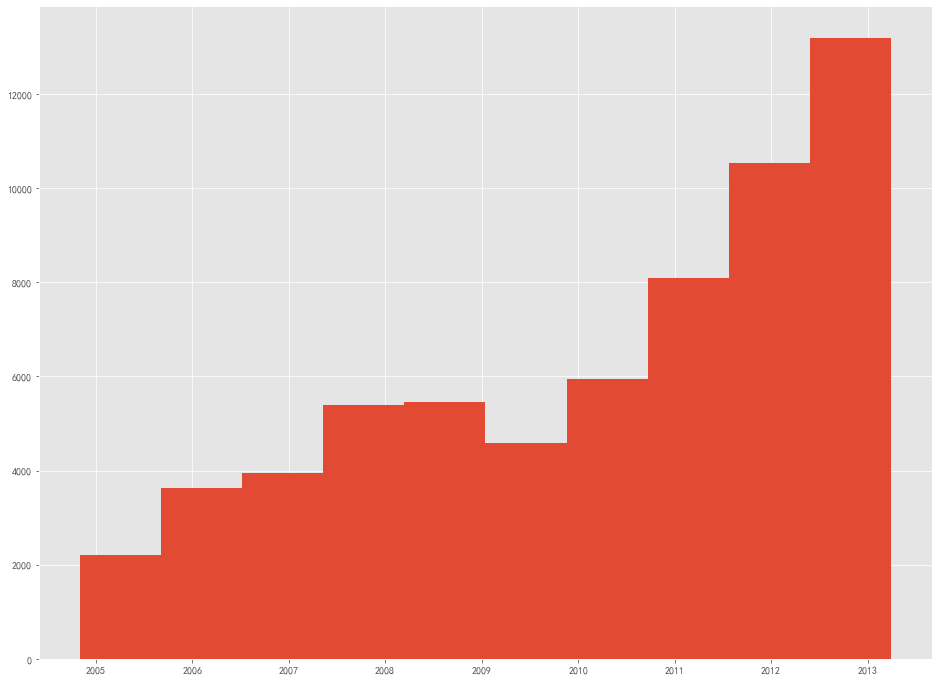

In [170]:
df['FFP_DATE'].hist(figsize=(16,12))  #查看用户入会时间分布

由入会分布图 可以发现 入会人员一直在逐渐增长，且在2011年后快速增长  --》 

In [171]:
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'],format='%Y/%m/%d')

<AxesSubplot:>

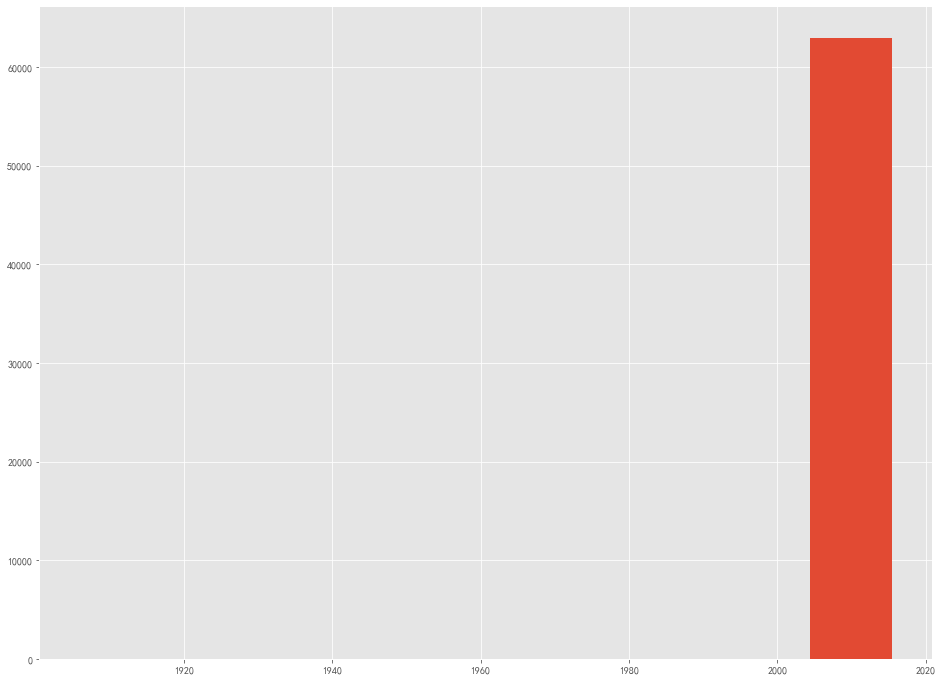

In [172]:
df['FIRST_FLIGHT_DATE'].hist(figsize=(16,12),bins=10)

<AxesSubplot:>

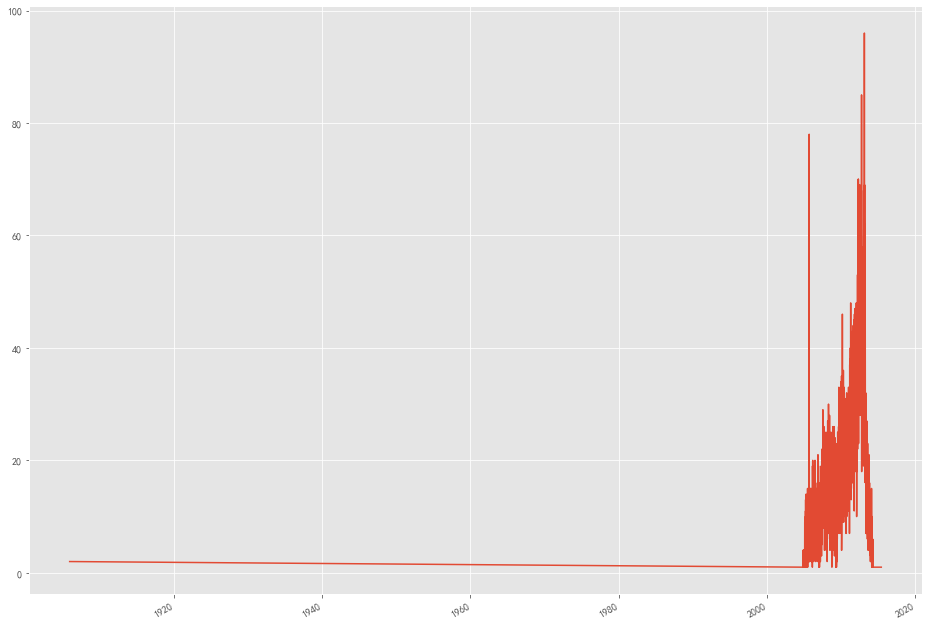

In [173]:
plt.subplots(figsize=(16,12))
df['FIRST_FLIGHT_DATE'].value_counts().plot()  

画出用户第一次飞行时间  发现 总04年开始快速增长到14年有下降趋势

([<matplotlib.patches.Wedge at 0x27ec0a4e730>,
 [Text(-0.811762931787003, 0.7423213203031217, 'male'),
  Text(0.811762897036433, -0.7423213583044863, 'female')],
 [Text(-0.44277978097472886, 0.4049025383471572, '76.42%'),
  Text(0.4427797620198725, -0.4049025590751743, '23.58%')])

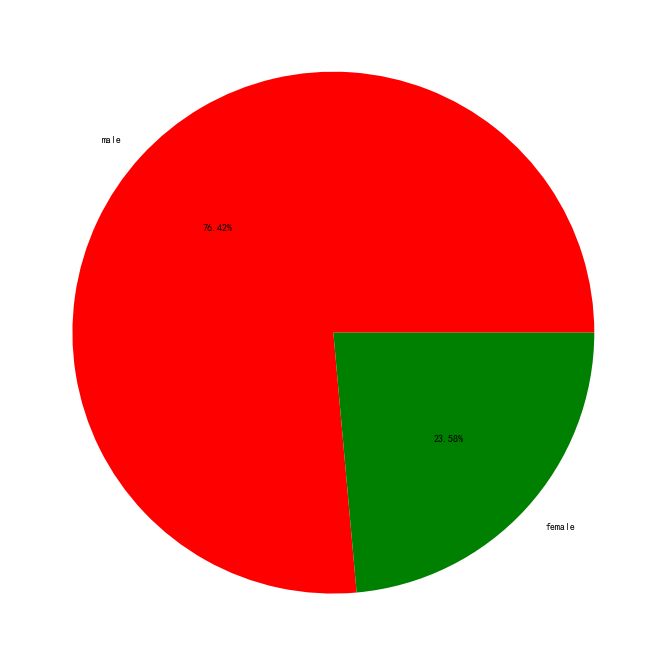

In [174]:
male = pd.value_counts(df['GENDER'])['男']
female = pd.value_counts(df['GENDER'])['女']
plt.subplots(figsize=(16,12))
plt.pie([male,female],colors=['r','g'],labels=['male','female'],autopct='%1.2f%%')

性别饼图 发现男性占比76%  是女性客户的三倍还要多

In [175]:
df['FFP_TIER'].value_counts()

4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

([<matplotlib.patches.Wedge at 0x27ec29d88e0>,
 [Text(-1.0670202132105133, 0.2673347425984713, 'level4'),
  Text(1.043828939835022, -0.34701749864076603, 'level5'),
  Text(1.096869465103967, -0.08292994949074363, 'level6')],
 [Text(-0.5820110253875527, 0.14581895050825705, '92.19%'),
  Text(0.569361239910012, -0.18928227198587236, '5.41%'),
  Text(0.5982924355112547, -0.045234517904041975, '2.40%')])

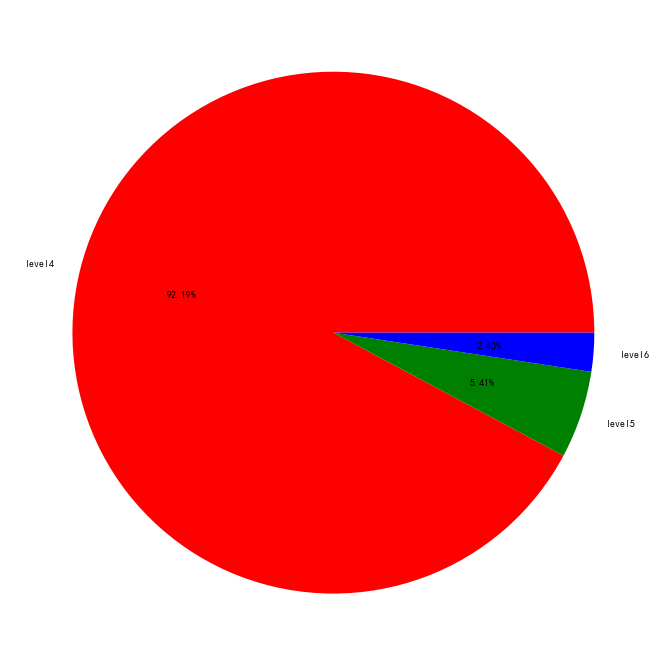

In [176]:
level4 = pd.value_counts(df['FFP_TIER'])[4]
level5 = pd.value_counts(df['FFP_TIER'])[5]
level6 = pd.value_counts(df['FFP_TIER'])[6]
plt.subplots(figsize=(16,12))
plt.pie([level4,level5,level6],labels=['level4','level5','level6'],autopct='%1.2f%%',
        colors=['r','g','b'])

由客户等级分布图所示 level4 占比92% 是主要客户  level5,level6 或许是重要客户？需要进一步分析

{'whiskers': [<matplotlib.lines.Line2D at 0x27ec2a9d1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ec2a9dd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ec2a9d940>],
 'medians': [<matplotlib.lines.Line2D at 0x27ec2a42b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ec2a42f10>],
 'means': []}

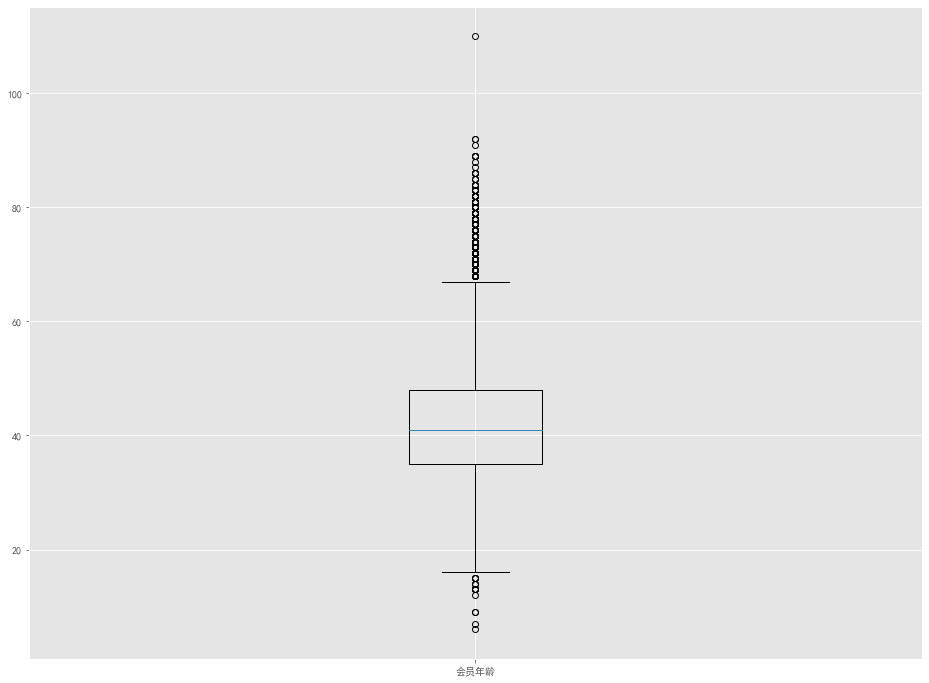

In [177]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
age = df['AGE'].dropna()
plt.subplots(figsize=(16,12))
plt.boxplot(age,labels=['会员年龄'],showfliers=True,showbox=True)

发现会员年龄主要集中在 20 - 60岁之间

------------------------------------------------
客户乘机信息分布分析
--------------------------------------

{'whiskers': [<matplotlib.lines.Line2D at 0x27ec2912730>,
 'caps': [<matplotlib.lines.Line2D at 0x27ec29127f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ec29124f0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ec481bb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ec294d130>],
 'means': [<matplotlib.lines.Line2D at 0x27ec481b280>]}

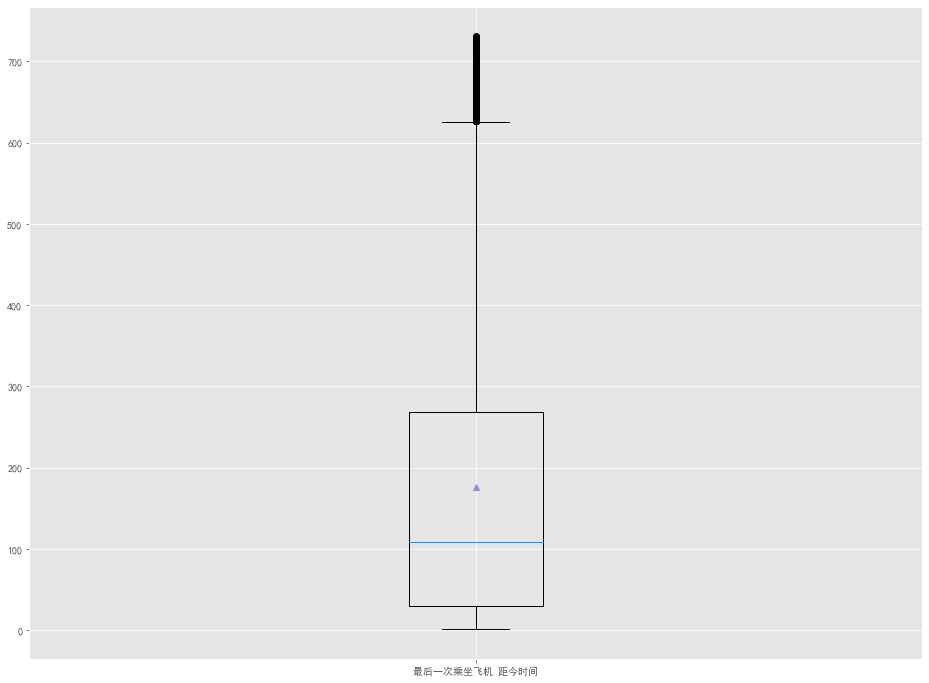

In [183]:
lte = df['LAST_TO_END']
fig = plt.subplots(figsize=(16,12))
plt.boxplot(lte,labels=['最后一次乘坐飞机 距今时长'],
            showfliers=True,showmeans=True)

发现大部分用户 用户时长在50~300 比较多  600 以上有一部分群体

{'whiskers': [<matplotlib.lines.Line2D at 0x27eb930f4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ebc238310>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ebc562970>],
 'medians': [<matplotlib.lines.Line2D at 0x27ec28eebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27eba04f670>],
 'means': []}

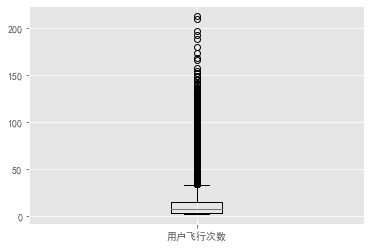

In [184]:
flight_count = df['FLIGHT_COUNT']
fig = plt.subplots(figsize=(16,12))
plt.boxplot(flight_count,labels=['用户飞行次数'])

从上面两个图发现可以划分为两类
   1  用户的飞行次数多处于 10~20之间  
   2  30往上还有另一部分群体  --》 重要价值客户

{'whiskers': [<matplotlib.lines.Line2D at 0x27ecebc0f40>,
 'caps': [<matplotlib.lines.Line2D at 0x27ebc7d5c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ecebc0400>],
 'medians': [<matplotlib.lines.Line2D at 0x27eba136bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ecebbbd00>],
 'means': []}

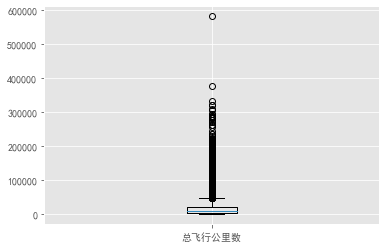

In [187]:
seg_sum = df['SEG_KM_SUM']
fig = plt.subplots(figsize=(16,12))
plt.boxplot(seg_sum,labels=['总飞行公里数'])

可划分为两类 
- 用户飞行公里数多处于一万七 到 四万之间  
- 五万之后有另一部分群体--> 可能是重要价值客户  

---------------
客户积分信息分布分析
-----------

{'whiskers': [<matplotlib.lines.Line2D at 0x27ec05fa490>,
 'caps': [<matplotlib.lines.Line2D at 0x27eba0b77c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ebc401eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ec4921370>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ec49215e0>],
 'means': []}

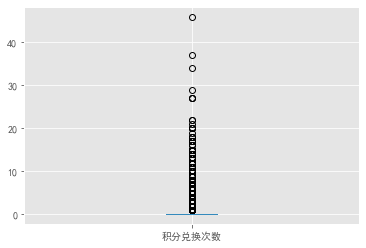

In [194]:
exchange_count = df['EXCHANGE_COUNT']
fig = plt.subplots(figsize=(16,12))
plt.boxplot(exchange_count,labels=['积分兑换次数'])

可划分为两类
- 一大部分人没兑换过积分
- 会换过积分的  --》 重要客户 （兑换过积分说明 乘坐飞机次数多）

{'whiskers': [<matplotlib.lines.Line2D at 0x27ecebdc760>,
 'caps': [<matplotlib.lines.Line2D at 0x27ecebdc070>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ecebe8520>],
 'medians': [<matplotlib.lines.Line2D at 0x27ecebdc4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ecebe02e0>],
 'means': []}

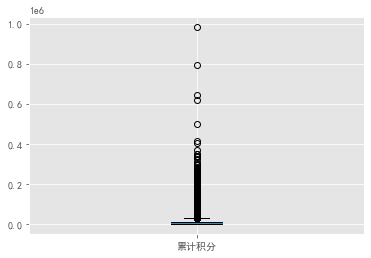

In [196]:
point_sum = df['Points_Sum']
fig = plt.subplots(figsize=(16,12))
plt.boxplot(point_sum,labels=['累计积分'])

可分为两类
- 积分未达到平均值  接近于0
- 积分超过平均值  --》 重要客户

--------------------------
相关性分析
---------------------------

--------------------------

In [198]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'EP_SUM_YR_1', 'EP_SUM_YR_2', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'WEIGHTED_SEG_KM', 'LAST_FLIGHT_DATE',
       'AVG_FLIGHT_COUNT', 'AVG_BP_SUM', 'BEGIN_TO_FIRST', 'LAST_TO_END',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'ADD_POINTS_SUM_YR_1',
       'ADD_POINTS_SUM_YR_2', 'EXCHANGE_COUNT', 'avg_discount',
       'P1Y_Flight_Count', 'L1Y_Flight_Count', 'P1Y_BP_SUM', 'L1Y_BP_SUM',
       'EP_SUM', 'ADD_Point_SUM', 'Eli_Add_Point_Sum', 'L1Y_ELi_Add_Points',
       'Points_Sum', 'L1Y_Points_Sum', 'Ration_L1Y_Flight_Count',
       'Ration_P1Y_Flight_Count', 'Ration_P1Y_BPS', 'Ration_L1Y_BPS',
       'Point_NotFlight'],
      dtype='object')

In [201]:
importance_feat = ['FFP_TIER','FLIGHT_COUNT',
                  'LAST_TO_END','EXCHANGE_COUNT','SEG_KM_SUM','Points_Sum']
data_corr = df[importance_feat]
data_corr

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,EXCHANGE_COUNT,SEG_KM_SUM,Points_Sum
0,6,210,1,34,580717,619760
1,6,140,7,29,293678,415768
2,6,135,11,20,283712,406361
3,5,23,97,11,281336,372204
4,6,152,5,27,309928,338813
...,...,...,...,...,...,...
62983,4,2,297,1,1134,12318
62984,4,4,89,14,8016,106972
62985,4,2,29,0,2594,0
62986,4,2,400,0,3934,0


In [202]:
age1 = df['AGE'].fillna(0)
data_corr['age'] = age1
ffp_year = pd.to_datetime(df['FFP_DATE'],format='%Y/%m/%d').apply(lambda x : x.year)
data_corr['ffp_year'] = ffp_year
data_corr

<ipython-input-202-b6d8c7eebc46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['age'] = age1
<ipython-input-202-b6d8c7eebc46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['ffp_year'] = ffp_year


,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,EXCHANGE_COUNT,SEG_KM_SUM,Points_Sum,age,ffp_year
0,6,210,1,34,580717,619760,31.0,2006
1,6,140,7,29,293678,415768,42.0,2007
2,6,135,11,20,283712,406361,40.0,2007
3,5,23,97,11,281336,372204,64.0,2008
4,6,152,5,27,309928,338813,48.0,2009
...,...,...,...,...,...,...,...,...
62983,4,2,297,1,1134,12318,25.0,2011
62984,4,4,89,14,8016,106972,38.0,2010
62985,4,2,29,0,2594,0,43.0,2006
62986,4,2,400,0,3934,0,36.0,2013


In [213]:
df_corr = data_corr.corr(method='pearson')
df_corr

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,EXCHANGE_COUNT,SEG_KM_SUM,Points_Sum,age,ffp_year
FFP_TIER,1.000000,0.582447,-0.206313,0.342355,0.522350,0.559249,0.076245,-0.116510
FLIGHT_COUNT,0.582447,1.000000,-0.404999,0.502501,0.850411,0.747092,0.075309,-0.188181
LAST_TO_END,-0.206313,-0.404999,1.000000,-0.169717,-0.369509,-0.292027,-0.027654,0.117913
EXCHANGE_COUNT,0.342355,0.502501,-0.169717,1.000000,0.507819,0.578581,0.032760,-0.216610
SEG_KM_SUM,0.522350,0.850411,-0.369509,0.507819,1.000000,0.853014,0.087285,-0.171508
Points_Sum,0.559249,0.747092,-0.292027,0.578581,0.853014,1.000000,0.074887,-0.163431
age,0.076245,0.075309,-0.027654,0.032760,0.087285,0.074887,1.000000,-0.242579
ffp_year,-0.116510,-0.188181,0.117913,-0.216610,-0.171508,-0.163431,-0.242579,1.000000


<AxesSubplot:>

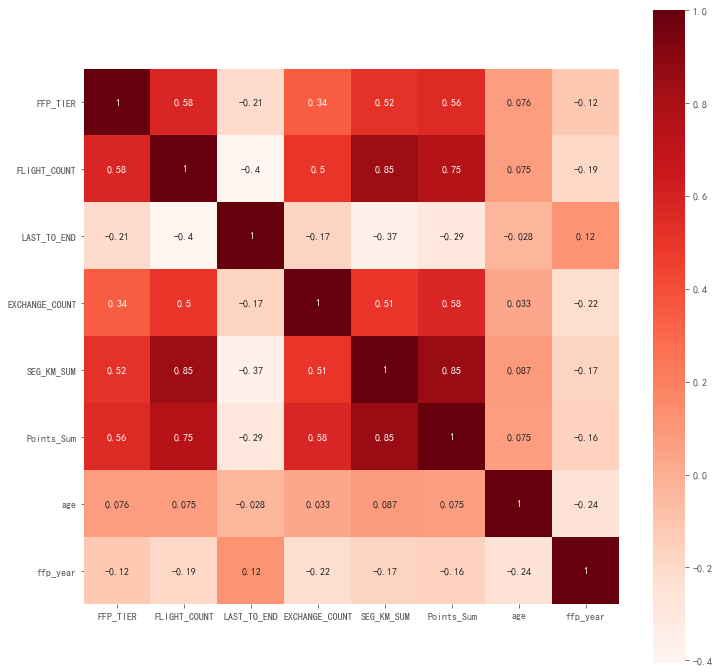

In [217]:
plt.subplots(figsize=(12,12))
sns.heatmap(df_corr,vmax=1,square=True,cmap='Reds',annot=True)

发现如下：
- 飞行总公里数与总积分相关性较强
- 其他特征相关性比较弱

In [218]:
data_corr.to_csv('data_corr.csv',index=False)